<a href="https://colab.research.google.com/github/Agrover112/CC1702-ML-Lab/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split, KFold,cross_val_score,StratifiedKFold

Loading our dataset

In [3]:
digits = load_digits()

In [4]:
n_samples = len(digits.images)

X = digits.images.reshape((n_samples, -1))
# Getting the already known targets for each image
y = digits.target

In [17]:
def plot_images_sample(X, Y):
    # Draw plot for images sample
    
    plt.figure(figsize=(6,6))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        plt.xlabel(Y[index])
    plt.show()

Visualizing the images in the dataset

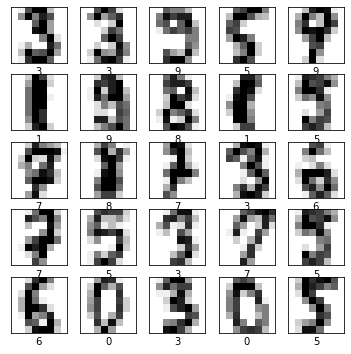

In [18]:
plot_images_sample(digits.images, y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [34]:
clf = KNeighborsClassifier(n_neighbors=3)
# Training model
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
predicted = clf.predict(X_test)

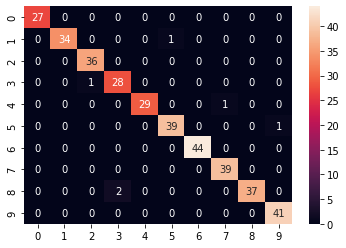

In [36]:
sns.heatmap(confusion_matrix(y_test, predicted),annot=True)

Classification Report

In [71]:
classification_report(y_test,predicted)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        27\n           1       0.95      1.00      0.97        35\n           2       1.00      0.97      0.99        36\n           3       0.94      1.00      0.97        29\n           4       1.00      0.97      0.98        30\n           5       0.97      0.97      0.97        40\n           6       1.00      1.00      1.00        44\n           7       0.93      1.00      0.96        39\n           8       1.00      0.87      0.93        39\n           9       0.98      0.98      0.98        41\n\n    accuracy                           0.97       360\n   macro avg       0.98      0.98      0.98       360\nweighted avg       0.98      0.97      0.97       360\n'

Accuracy Score

In [38]:
accuracy_score(y_test,predicted)

0.9833333333333333

Visualizing our predicitions

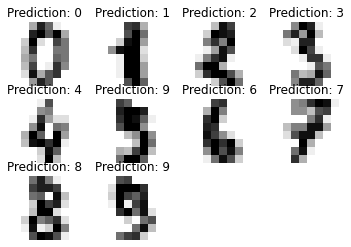

In [39]:
image_with_prediction = list(zip(digits.images, clf.predict(X)))
# for first 10 images
for pos, (image, prediction) in enumerate(image_with_prediction[:10]):
    plt.subplot(3, 4, pos+1) # Create 3x4 grid
    plt.axis('off') # no axis
    plt.imshow(image, cmap=plt.cm.gray_r) # show image in gray scale
    plt.title("Prediction: %i" % prediction) # set title to predicted value
plt.show()

# Testing for different K values

In [42]:
acc=[]
for K in range(1,10):
  clf = KNeighborsClassifier(n_neighbors=K)
  clf.fit(X_train, y_train)
  predicted = clf.predict(X_test)
  acc.append(accuracy_score(y_test,predicted))

Text(0, 0.5, 'Accuracy Scores')

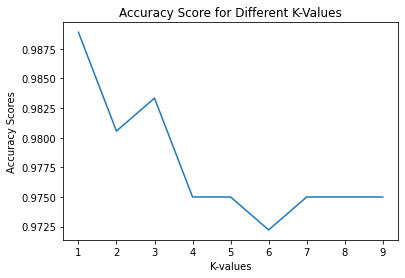

In [47]:
plt.plot(range(1,10),acc)
plt.title("Accuracy Score for Different K-Values")
plt.xlabel("K-values")
plt.ylabel("Accuracy Scores")

# Now doing K-Fold cross validation

In [49]:
n_samples

1797

In [58]:
k_fold = StratifiedKFold(10)

In [64]:
cross_val_scores=[]
for k in range(1,10):
  clf = KNeighborsClassifier(n_neighbors=K)
  clf.fit(X_train, y_train)
  cross_val_scores.append(cross_val_score(clf, X, y, cv=k_fold,n_jobs=-1).mean())
  

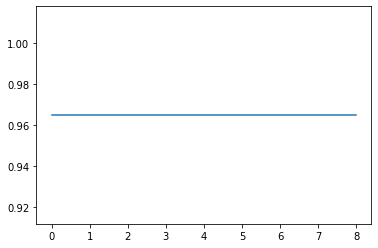

In [67]:
plt.plot(cross_val_scores)

Thus, as can be seen from cross-validation and accuracy-scores value of K=3 was the best which we already chose.